# Machine Learning: Grafos

**Autores:** V. Miguel Sempere Navarro, Manuel del Pino Guerrero, Santiago García Gisbert

## Introducción

En la presente práctica y final de la asignatura, nuestro grupo ha decidido abordar un estudio de los grafos justificado por la alta importancia que estos tienen en el campo de la ciencia de datos y con el objetivo de aprender una base de estos. Para ello, se va a estructurar la práctica de la siguiente manera:

* En primer lugar, se explicará qué es un Grafo.
* Lo siguiente será explicar las partes del mismo.
* Se realizará un ejemplo explicativo.
* Se extraerán conclusiones globales.

## Definición de un Grafo

En matemáticas y ciencias de la computación, un grafo (del griego grafos: dibujo, imagen) es un conjunto de objetos llamados vértices o nodos unidos por enlaces llamados aristas o arcos, que permiten representar relaciones binarias entre elementos de un conjunto.

Al analizar los grafos, los expertos logran conocer cómo se desarrollan las relaciones recíprocas entre aquellas unidades que mantienen algún tipo de interacción.

Los grafos pueden clasificarse de diversas maneras según sus características. Los grafos simples, en este sentido, son aquellos que surgen cuando una única arista logra unir dos vértices. Los grafos complejos, en cambio, presentan más de una arista en unión con los vértices.

Por otra parte, un grafo es conexo si dispone de dos vértices conectados a través de un camino. ¿Qué quiere decir esto? Que, para el par de vértices (p, r), tiene que existir algún camino que permita llegar desde p hasta r.

En cambio, un grafo es fuertemente conexo si el par de vértices tiene conexión a través de, como mínimo, dos caminos diferentes.

Un grafo simple, además, puede ser completo si las aristas están en condiciones de unir todos los pares de vértices, mientras que un grafo es bipartito si sus vértices surgen por la unión de un par de conjuntos de vértices y si se cumple una serie de condiciones.

Entre las aplicaciones o importancia de los grafos esta el poder ordenar de una forma eficaz mediante algoritmos el trayecto del camino mas corto entre un punto y otro pasando por uno cuantos o muchos otros vértices(puntos).

Formalmente, un grafo G = ( V , E ) es una pareja ordenada en la que V es un conjunto no vacío de vértices y E es un conjunto de aristas. Donde V consta de pares no ordenados de vértices, tales como {x , y} ∈ E entonces decimos que x e y son adyacentes; y se representa mediante una línea no orientada que una dichos vértices. Si el grafo es dirigido se le llama digrafo, se denota D, y entonces el par ( x , y ) es un par ordenado, y se representa con una flecha que va de x a y, y decimos que ( x , y ) ∈ E.

## Partes de un Grafo

Los grafos, como hemos visto anteriormente, se dividen en:

* Vértice: también denominado nodo, es la unidad fundamental de la que están formados los grafos. Un grafo no dirigido está formado por un conjunto de vértices y un conjunto de aristas (pares no ordenados de vértices), mientras que un grafo dirigido está compuesto por un conjunto de vértices y un conjunto de arcos (pares ordenados de vértices). Los vértices pueden contener información adicional, conocida como “carga útil”. V={V0,V1,V2,V3,V4,V5}. Los vertices pueden ser:
        - Vértices Adyacentes: si tenemos un par de vértices de un grafo (U, V) y si tenemos un arista que los une, entonces U y V son vértices adyacentes y se dice que U es el vértice inicial y V el vértice adyacente.
        - Vértice Aislado: Es un vértice de grado cero.
        - Vértice Terminal: Es un vértice de grado 1.
* Arista: también denominada arco, es la línea que conecta dos nodos y que pone de manifiesto la relación entre ellos. En este sentido, dados dos vértices a y b pertenecientes al conjunto V, una arista se define, para un grafo no dirigido, como el conjunto e = {a,b} (o {b,a}), en tanto que para un grafo dirigido, como el par ordenado e = (a,b) (donde (b,a) representaría una arista diferente, con el nodo origen y destino cambiados). Además, las aristas pueden ser:
        - Aristas Adyacentes: Se dice que dos aristas son adyacentes si convergen en el mismo vértice.
        - Aristas Paralelas: Se dice que dos aristas son paralelas si vértice inicial y el final son el mismo.
        - Aristas Cíclicas: Arista que parte de un vértice para entrar en el mismo (también llamadas lazos).
        - Cruce: Son dos aristas que cruzan en un punto.
* Caminos: Se llama camino a una secuencia de vértices de un grafo tal que exista una arista, cada vértice y el siguiente. Se dice que dos vértices están conectados si existe un camino que vaya de uno a otro, de lo contrario estarán desconectados.  Formalmente los definiríamos como w1,w2,...,wn tal que (wi, wi +1) ∈E para todo 1 ≤ i ≤ n − 1.
* Ponderación: Las aristas pueden ponderarse para mostrar que existe una diferencia cuantitativa  y/o cualitativa de desplazarse de un vértice a otro.

## Práctica: aeropuertos y vuelos

El objeto de estudio de esta práctica es representar mediante grafos un mapa de vuelos y aeropuertos de los Estados Unidos de América. En este caso, los aeropuertos representarán nodos y los vuelos representarán las uniones entre los nodos. Esta representación no corresponde con vuelos en tiempo real, sino con conexiones disponibles entre aeropuertos.

Gracias a este ejemplo, el lector será capaz de entender rápidamente qué es y para qué sirve un grafo.

### Librerías

**Librería Networkx**

NetworkX es un paquete de Python para la creación, manipulación y estudio de las estructuras, dinámicas y funciones de redes complejas. NetworkX esta diseñado con el fin de poder ayudar al estudio de dinámicas sociales, biología y diseño de redes, es de fácil uso y rápido desarrollo como veremos en esta serie.

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

* Vamos entonces a importar Pandas para crear DataFrames y numpy para las operaciones numéricas (Numerical Python)

In [7]:
import numpy as np
import pandas as pd

* Por último, importamos el resto de librerías que nos van a ser útiles para la correcta ejecución de nuestro programa

In [8]:
import math
from array import array
from IPython.display import Image
%matplotlib inline

In [46]:
import community

### Desarrollo

En primer lugar, se carga el archivo de rutas. Como el archivo no tiene nombres de las variables, creamos un vector con los nombres y lo añadimos al dataset.

In [10]:
nombres = ('aerolínea,aerolínea_id,'
         'origen,origen_id,'
         'destino,destino_id,'
         'codeshare,paradas,flota').split(',')

rutas = pd.read_csv(
    'rutas.txt',
    names=nombres,
    header=None)

rutas.head(10)

,aerolínea,aerolínea_id,origen,origen_id,destino,destino_id,codeshare,paradas,flota
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
5,2B,410,DME,4029,KZN,2990,NaN,0,CR2
6,2B,410,DME,4029,NBC,6969,NaN,0,CR2
7,2B,410,DME,4029,TGK,\N,NaN,0,CR2
8,2B,410,DME,4029,UUA,6160,NaN,0,CR2
9,2B,410,EGO,6156,KGD,2952,NaN,0,CR2


Del mismo modo, hacemos el mismo paso anterior pero con un archivo correspondiente a los aeropuertos.

In [11]:
nombres = ('id,aeropuerto,ciudad,país,iata,icao,latitud,longitud,'
         'altura,timezone,dst,tz,tipo,origen').split(',')

aeropuertos = pd.read_csv(
    'aeropuertos.txt',
    header=None,
    names=nombres,
    index_col=4,
    na_values='\\N')
aeropuertos_USA = aeropuertos[aeropuertos['país'] ==
                       'United States']

aeropuertos_USA

,id,aeropuerto,ciudad,país,icao,latitud,longitud,altura,timezone,dst,tz,tipo,origen
iata,,,,,,,,,,,,,
BTI,3411,Barter Island LRRS Airport,Barter Island,United States,PABA,70.134003,-143.582001,2.0,-9,A,America/Anchorage,airport,OurAirports\
LUR,3413,Cape Lisburne LRRS Airport,Cape Lisburne,United States,PALU,68.875099,-166.110001,16.0,-9,A,America/Anchorage,airport,OurAirports\
PIZ,3414,Point Lay LRRS Airport,Point Lay,United States,PPIZ,69.732903,-163.005005,22.0,-9,A,America/Anchorage,airport,OurAirports\
ITO,3415,Hilo International Airport,Hilo,United States,PHTO,19.721399,-155.048004,38.0,-10,N,Pacific/Honolulu,airport,OurAirports\
ORL,3416,Orlando Executive Airport,Orlando,United States,KORL,28.545500,-81.332901,113.0,-5,A,America/New_York,airport,OurAirports\
BTT,3417,Bettles Airport,Bettles,United States,PABT,66.913902,-151.529007,647.0,-9,A,America/Anchorage,airport,OurAirports\
Z84,3418,Clear Airport,Clear Mews,United States,PACL,64.301201,-149.119995,552.0,-9,A,America/Anchorage,airport,OurAirports\
UTO,3419,Indian Mountain LRRS Airport,Indian Mountains,United States,PAIM,65.992798,-153.703995,1273.0,-9,A,America/Anchorage,airport,OurAirports\
FYU,3420,Fort Yukon Airport,Fort Yukon,United States,PFYU,66.571503,-145.250000,433.0,-9,A,America/Anchorage,airport,OurAirports\


A continuación, vamos a juntar los dos archivos previos que hemos cargado para crear los nodos.

In [12]:
rutas_USA = rutas[
    rutas['origen'].isin(aeropuertos_USA.index) &
    rutas['destino'].isin(aeropuertos_USA.index)]
rutas_USA.head(10)

,aerolínea,aerolínea_id,origen,origen_id,destino,destino_id,codeshare,paradas,flota
172,2O,146,ADQ,3531,KLN,7162,NaN,0,BNI
177,2O,146,KLN,7162,KYK,7161,NaN,0,BNI
260,3E,10739,BRL,5726,ORD,3830,NaN,0,CNC
261,3E,10739,BRL,5726,STL,3678,NaN,0,CNC
262,3E,10739,DEC,4042,ORD,3830,NaN,0,CNC
263,3E,10739,DEC,4042,STL,3678,NaN,0,CNC
264,3E,10739,JBR,3591,STL,3678,NaN,0,CNC
265,3E,10739,ORD,3830,BRL,5726,NaN,0,CNC
266,3E,10739,ORD,3830,DEC,4042,NaN,0,CNC
267,3E,10739,STL,3678,BRL,5726,NaN,0,CNC


Seguidamente, y gracias al objeto creado en el paso anterior, creamos las conexiones entre los nodos.

In [13]:
edges = rutas_USA[['origen', 'destino']].values
edges

array([['ADQ', 'KLN'],
       ['KLN', 'KYK'],
       ['BRL', 'ORD'],
       ...,
       ['SOW', 'PHX'],
       ['VIS', 'LAX'],
       ['WRL', 'CYS']], dtype=object)

In [14]:
g = nx.from_edgelist(edges)

In [15]:
len(g.nodes()), len(g.edges())

(546, 2781)

Ahora que ya se ha preparado los nodos (aeropuertos) y las conexiones entre ellos (rutas), se procede a graficar el grafo.

En él aparecen los nombres de los identificadores de los aeropuertos. Puesto que hay muchos aropuertos, los lugares de mayor concentración son difíciles de identificar. Se puede apreciar que este grafo tiene una forma parecida al mapa de EEUU.

Una buena forma de mejorarlo sería añadiendo una imagen con el mapa del país y el grafo superponiendo dicha imagen.

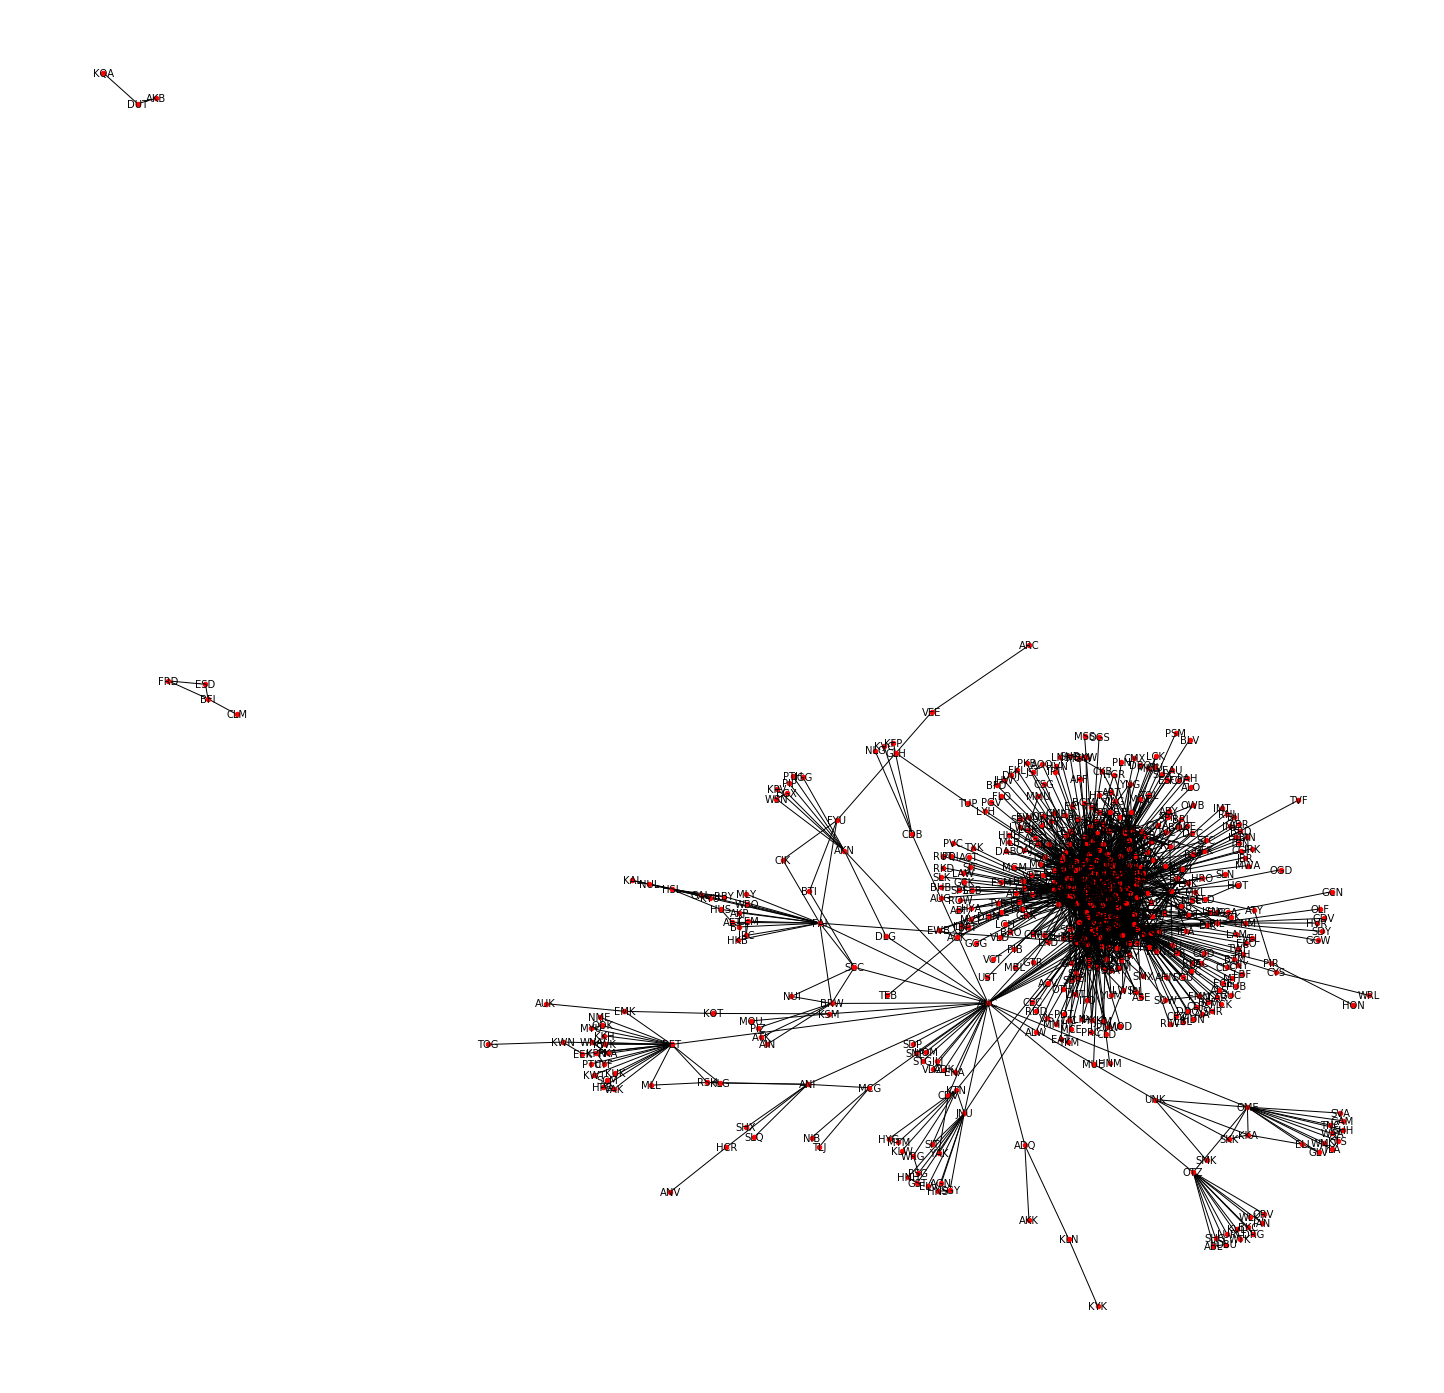

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
nx.draw_networkx(g, ax=ax, node_size=20,
                 font_size=10, alpha=1,
                 width=1)
ax.set_axis_off()

In [17]:
sg = next(nx.connected_component_subgraphs(g))

A continuación vamos a plotear el mismo grafo pero sin los identificadores. Puesto que se aumenta la cercanía de la imagen considereblemente, se pierden 4 aeropuertos que según parece; son islas.

Si hiciesemos un estudio de comunidades, podríamos observar como hay grupos o clusters de aeropuertos desde los cuales no se puede viajar a otra zona más lejana sin pasar por uno en concreto. Algo parecido a lo que pasa en España con los vuelos desde Madrid o Barcelona cuando son transoceánicos.

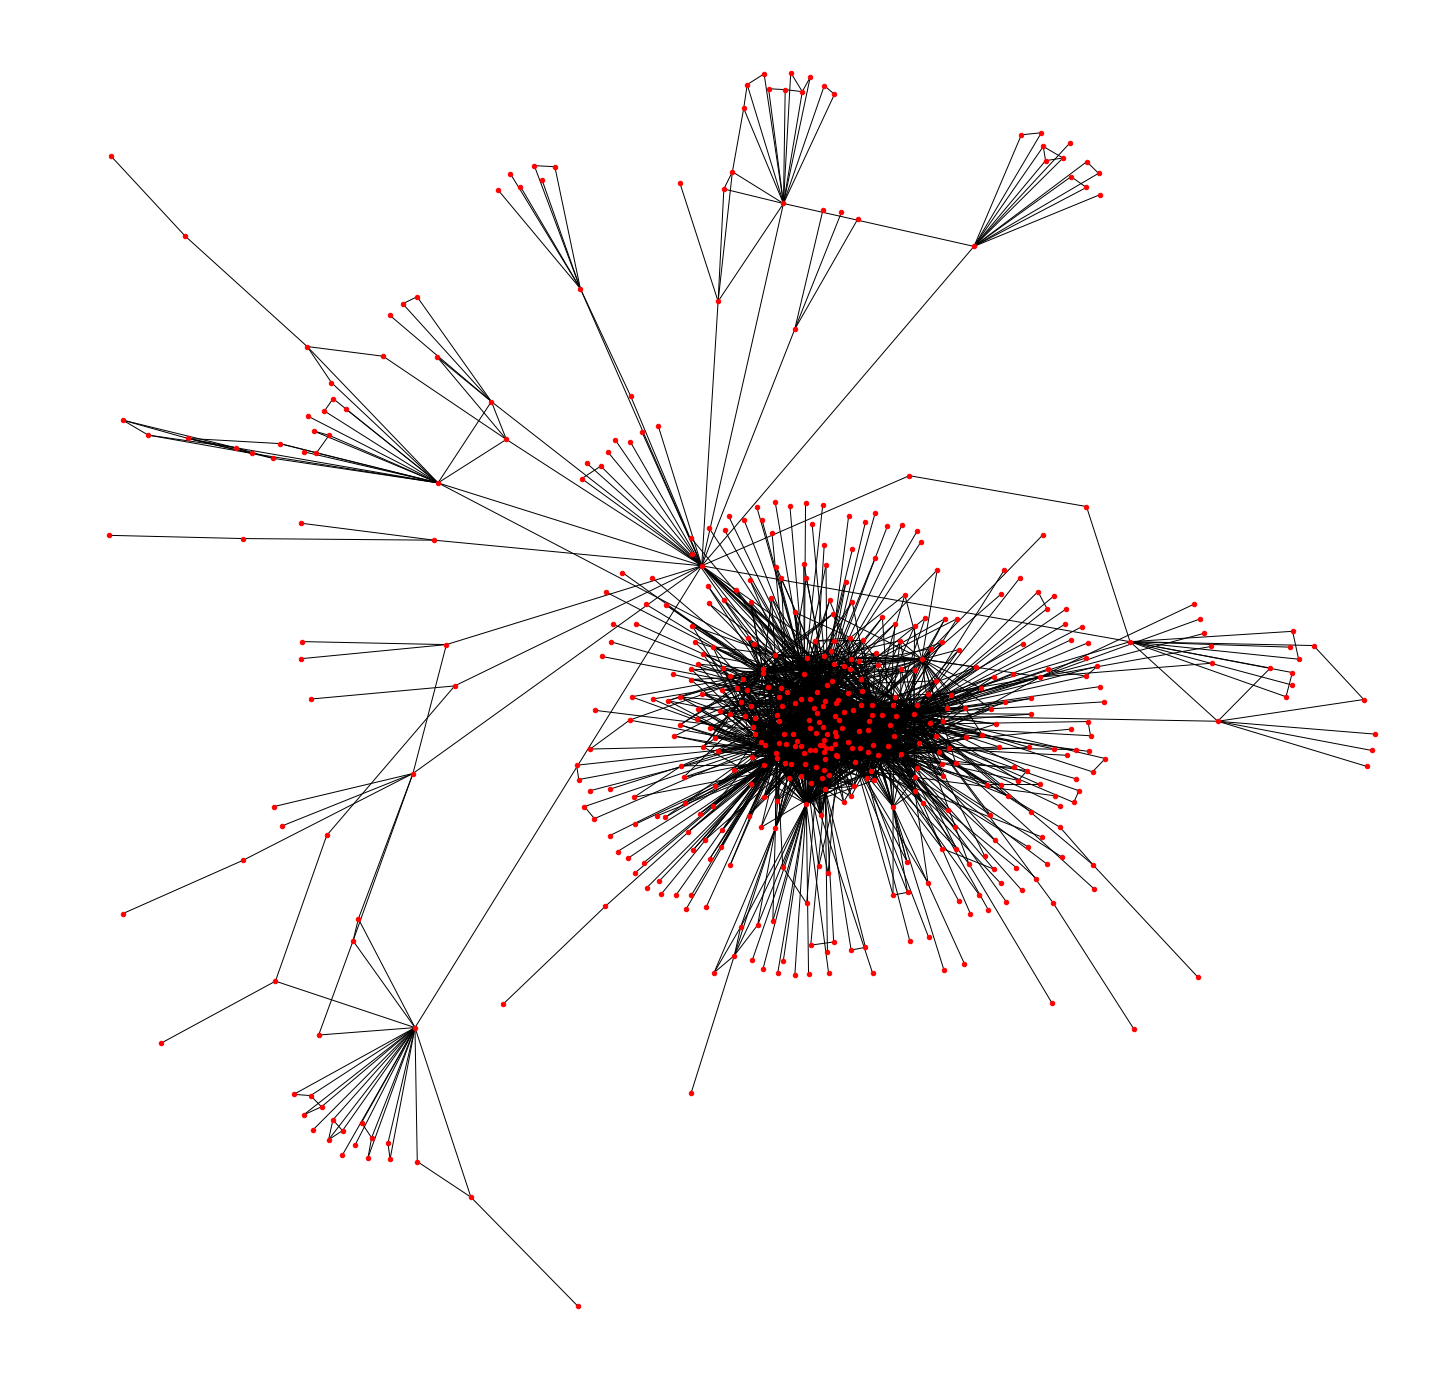

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
nx.draw_networkx(sg, ax=ax, with_labels=False,
                 node_size=20, width=1)
ax.set_axis_off()

Estudiamos el algoritmo del análisis de las comunidades y se pueden observar siete grandes grupos, junto con un octavo formado por apenas seis nodos. Estas comunidades se forman ya que  los nodos de la red pueden ser fácilmente agrupados en grupos de nodos, potencialmente superpuestos.

In [47]:
part = community.best_partition(sg)

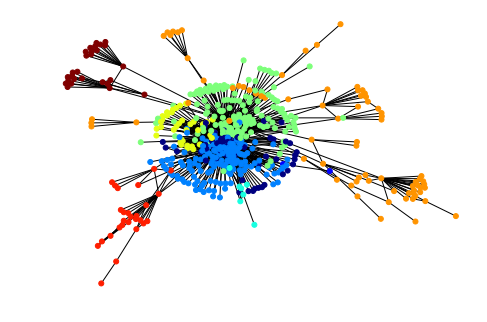

In [54]:
values = [part.get(node) for node in sg.nodes()]
nx.draw_spring(sg, cmap = plt.get_cmap('jet'), node_color = values, node_size=25, with_labels=False)
plt.show()

## Conclusión

En el presente documento hemos realizado un tratamiento sobre grafos, los cuáles son una herramienta muy útil, de la cual podemos beneficiarnos en tres aspectos: 
* Aumentan el rendimiento: Cada organización tendrá datos y los conjuntos de datos siempre seguirán creciendo. El crecimiento de estos conjuntos de datos también conducirá al crecimiento en las conexiones que tienen los conjuntos de datos. Los grafos de bases de datos están específicamente diseñadas para entender las relaciones entre diferentes partes de datos, lo que significa que el crecimiento de las relaciones no dificultará el rendimiento.
* Proporcionan flexibilidad: El uso de grafos de bases de datos también es flexible, ya que la base de datos puede cambiar a la misma velocidad que la de su organización. La estructura del modelo se adapta a todo tipo de necesidades y requerimientos.
* Mejoran la agilidad: Los grafos de base de datos también admite agilidad, que es crucial en un entorno de desarrollo basado en pruebas. A medida que cambian los requisitos de su empresa, la base de datos puede cambiar con ella.

El mundo interconectado de hoy significa que diferentes piezas de información están conectadas entre sí en una serie de formas únicas. El uso de los grafos, en especial para bases de datos, significa que no sólo podemos entender la importancia de la información y los datos, sino las relaciones entre ellos.

Hemos visto la utilización de los grafos para representar las conexiones aeroportuarias estadounidenses, viendo cuales son los aeropuertos que tienen conexiones entre sí -los que quedan en el centro de la representación- y cuáles tienen conexiones más limitadas, que exigen pasar por otros nodos para completar rutas concretas.
